In [5]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib.animation import FuncAnimation

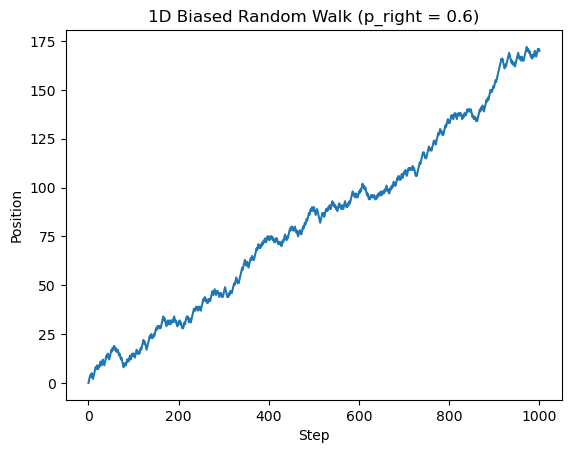

In [1]:


def biased_random_walk(n_steps=1000, p_right=0.6):
    position = 0
    positions = [position]

    for _ in range(n_steps):
        step = 1 if random.random() < p_right else -1
        position += step
        positions.append(position)

    return positions

# Run a walk
walk = biased_random_walk(1000, p_right=0.6)

# Plot the result
plt.plot(walk)
plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1D Biased Random Walk (p_right = 0.6)")
plt.show()


[0, -1, -2, -2, -1, -2, -2, -3, -2, -1, 0, 1, 2, 3, 2, 1, 2, 1, 1, 0, 1, 0, -1, -2, -3, -2, -1, 0, -1, 0, -1, -2, -3, -2, -1, -2, -3, -2, -3, -4, -5, -4, -5, -6, -7, -8, -7, -8, -9, -8, -9, -10, -9, -8, -7, -8, -9, -9, -8, -7, -6, -7, -6, -7, -6, -5, -6, -7, -8, -9, -9, -9, -8, -7, -8, -7, -6, -7, -8, -9, -8, -7, -6, -7, -6, -7, -6, -7, -8, -7, -8, -8, -9, -8, -9, -10, -9, -8, -7, -8, -9, -10, -9, -8, -7, -6, -7, -8, -7, -8, -7, -6, -5, -4, -5, -6, -5, -4, -3, -2, -2, -3, -4, -5, -6, -5, -6, -5, -6, -7, -6, -6, -5, -4, -3, -3, -2, -3, -4, -3, -2, -1, 0, -1, -1, -2, -3, -2, -1, -1, -2, -3, -4, -3, -2, -3, -2, -1, -2, -1, 0, -1, -2, -1, 0, 1, 0, -1, 0, 0, -1, -1, -2, -3, -4, -3, -2, -1, 0, -1, 0, 1, 0, 1, 2, 2, 3, 4, 3, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 2, 1]


RuntimeError: x must be a sequence

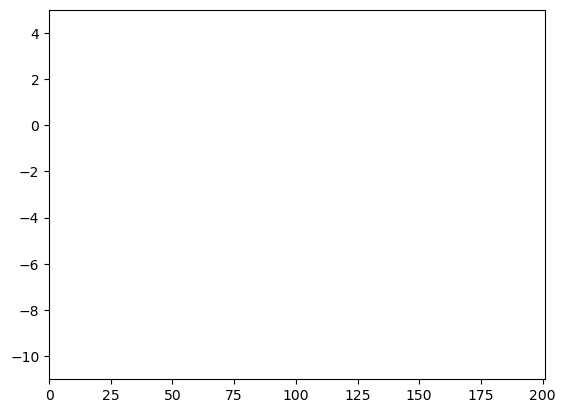

In [ ]:
def randomwalk(N_steps,p_right,p_left,p_stay):
    # assert abs(p_right + p_left + p_stay - 1) < 1e-9, #"Probabilities must sum to 1."
    position = 0
    positions = [position]
    for _ in range(N_steps):
        r = random.random()
        if r < p_right:
            step = 1
        elif r< p_right+p_left:
            step = -1
        elif r< p_right+p_left+p_stay:
            step =0
        
        position += step
        positions.append(position)
    return positions


# ----- Create walk -----
walk = randomwalk(200, 0.45, 0.45, 0.10)
print(walk)
# ----- Set up plot -----
fig, ax = plt.subplots()
ax.set_xlim(0, len(walk) - 1)
ax.set_ylim(min(walk) - 1, max(walk) + 1)
point, = ax.plot([], [], 'ro', markersize=8)  # red dot for the walker

# ----- Animation function -----
def animate(i):
    # set_data expects sequences for x and y; provide single-element lists
    point.set_data([i], [walk[i]])
    return (point,)

# ----- Create animation -----
ani = FuncAnimation(fig, animate, frames=len(walk), interval=50, blit=True)

plt.xlabel("Step")
plt.ylabel("Position")
plt.title("1D Biased Random Walk Animation")
plt.show()



k_plus  = 95.238 s^-1
k_minus = 4.762 s^-1
theory v = 723.81 nm/s
theory D = 3200.00 nm^2/s
(k_plus + k_minus)*dt = 0.1000  (less than 1)
numeric v ≈ 728.24 nm/s
20


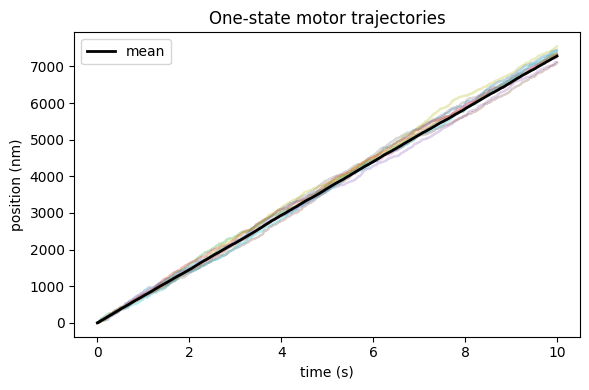

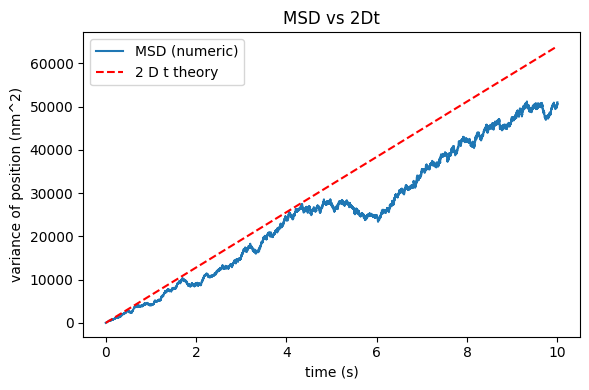

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 1. parameter

# step length
a = 8.0                 # nm

# steps per second
S = 100.0               # 每秒大约 100 次尝试跳步

#R analytic parameters
T = 20
kb = 1.38 * 10**-23 
g_atp = 2**-22
# direction R
R =20                #np.exp(g_atp/(kb*T))            


k_minus = S / (1.0 + R)
k_plus  = R * k_minus

print(f"k_plus  = {k_plus:.3f} s^-1")
print(f"k_minus = {k_minus:.3f} s^-1")

# theory: mean velocity and difussion constant for one state
v_theory = a * (k_plus - k_minus)          # nm / s
D_theory = (a**2 / 2.0) * (k_plus + k_minus)  # nm^2 / s

print(f"theory v = {v_theory:.2f} nm/s")
print(f"theory D = {D_theory:.2f} nm^2/s")

# ======================
# 2. simulation
# ======================

dt = 1e-3               # stimestep, satisfy (k+ + k-) * dt << 1
T_total = 10.0          # simulation time(s)
n_steps = int(T_total / dt)

n_traj = 50             # number trajectories

# checking probability 
p_jump = (k_plus + k_minus) * dt
print(f"(k_plus + k_minus)*dt = {p_jump:.4f}  (less than 1)")

# ======================
# 3. one-state biased random walk
# ======================

t = np.arange(n_steps) * dt
traj = np.zeros((n_traj, n_steps))

p_plus  = k_plus * dt
p_minus = k_minus * dt

for n in range(n_traj):
    x = 0.0  # initial position
    positions = np.zeros(n_steps)
    for i in range(1, n_steps):
        r = np.random.rand()
        if r < p_plus:
            x += a
        elif r < p_plus + p_minus:
            x -= a
        # otherwise stay
        positions[i] = x
    traj[n, :] = positions


mean_pos = traj.mean(axis=0)           # nm
var_pos = traj.var(axis=0)             # nm^2

# fit velocity”
# v_num ≈ (mean_pos[-1] - mean_pos[0]) / T_total
v_num = (mean_pos[-1] - mean_pos[0]) / T_total
print(f"numeric v ≈ {v_num:.2f} nm/s")
print(R)
# ======================
# 5. draw
# ======================

# (1) many trajectories and mean trajectory 
plt.figure(figsize=(6,4))
for n in range(min(n_traj, 10)):
    plt.plot(t, traj[n], alpha=0.3)
plt.plot(t, mean_pos, 'k', linewidth=2, label='mean')
plt.xlabel('time (s)')
plt.ylabel('position (nm)')
plt.legend()
plt.title('One-state motor trajectories')
plt.tight_layout()
plt.show()

# (2) compare with 2 D t
plt.figure(figsize=(6,4))
plt.plot(t, var_pos, label='MSD (numeric)')
plt.plot(t, 2 * D_theory * t, 'r--', label='2 D t theory')
plt.xlabel('time (s)')
plt.ylabel('variance of position (nm^2)')
plt.legend()
plt.title('MSD vs 2Dt')
plt.tight_layout()
plt.show()
